In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard

In [2]:
FF_df = pd.read_csv('form_factors_200.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200_r.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200_r.csv')
FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [3]:
FF_df

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       603       604       605  \
0   -0.309006 -0.349255  0.267737  ... -0.513892 -0.299718 -0.477219   
1   -0.309460 -0.349860  0.267305  ... -0.514353 -0.299953 -0.477644   
2   -0.310820 -0.351675  0.266009  ... -0.515734 -0.300657 -0.478919   
3   -0.313086 -0.354698  0.263851  ... -0.518037 -0.301829 -0.481043   
4   -0.316257 -0.358928  0.260830  ... -0.521258 -0.303470 -0.484016   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.857844 -0.764482 -0.705293   
996 -0.656542 -0.659345 -0.777468  ... -0.857907 -0.765611 -0.704952   
997 -0.656158 -0.662494 -0.777772  ... -0.857928 -0.766756 -0.704615   
998 -0.655810 -0.665672 -0.778070  ... -0.857907 -0.767919 -0.704282   
999 -0.655498 -0.668877 -0.778360  ... -0.857847 -0.769097 -0.703954   

          606       607       608       609       610       611       612  
0    0.087297 -0.142115  0.840006 -0.459976 -0.427894  0.672328 -0.105556  
1    0.086667 -0.142717  0.839384 -0.460461 -0.428323  0.671703 -0.105924  
2    0.084776 -0.144520  0.837520 -0.461915 -0.429612  0.669829 -0.107030  
3    0.081625 -0.147525  0.834413 -0.464338 -0.431758  0.666705 -0.108872  
4    0.077216 -0.151730  0.830066 -0.467729 -0.434762  0.662335 -0.111451  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.861659 -0.689449 -0.738946 -0.677948 -0.761120 -0.640692 -0.750145  
996 -0.862931 -0.690513 -0.738721 -0.677956 -0.760901 -0.640672 -0.749707  
997 -0.864157 -0.691557 -0.738505 -0.678050 -0.760640 -0.640653 -0.749303  
998 -0.865337 -0.692583 -0.738300 -0.678230 -0.760337 -0.640635 -0.748932  
999 -0.866470 -0.693590 -0.738105 -0.678494 -0.759994 -0.640617 -0.748596  

[1000 rows x 613 columns]

In [13]:
TD_x_df

0         1         2         3         4         5         6    \
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098   

          7         8         9    ...       603       604       605  \
0   -1.719098 -1.719098 -1.719098  ... -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821  ... -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543  ... -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266  ... -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989  ... -1.649989 -1.649989 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  ...  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  ...  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  ...  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  ...  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  ...  1.719098  1.719098  1.719098   

          606       607       608       609       610       611       612  
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098  
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821  
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543  
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266  
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989  
..        ...       ...       ...       ...       ...       ...       ...  
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  

[200 rows x 613 columns]

In [14]:
TD_y_df

0         1         2         3         4         5         6    \
0   -0.958379 -0.770701 -0.981001 -0.903450 -0.905063 -0.820868 -0.724922   
1   -0.904582 -0.681823 -0.914998 -0.820895 -0.826098 -0.744415 -0.627986   
2   -0.853731 -0.600108 -0.851049 -0.744437 -0.750340 -0.672497 -0.532023   
3   -0.805567 -0.525489 -0.788997 -0.673929 -0.677635 -0.604940 -0.437146   
4   -0.759802 -0.457838 -0.728671 -0.609179 -0.607806 -0.541538 -0.343469   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.759976 -0.461557 -0.728637 -0.614287 -0.606924 -0.542608 -0.354168   
196 -0.806157 -0.529190 -0.788998 -0.679976 -0.676546 -0.606266 -0.448063   
197 -0.854733 -0.603799 -0.851088 -0.751408 -0.749047 -0.674075 -0.543146   
198 -0.905986 -0.685513 -0.915078 -0.828768 -0.824602 -0.746240 -0.639303   
199 -0.960174 -0.774398 -0.981123 -0.912196 -0.903369 -0.822933 -0.736421   

          7         8         9    ...       603       604       605  \
0   -0.952380 -0.811257 -0.979586  ... -0.671190 -0.834763 -0.808506   
1   -0.860360 -0.739881 -0.912874  ... -0.620604 -0.753137 -0.704143   
2   -0.768884 -0.672279 -0.849248  ... -0.572932 -0.671720 -0.608018   
3   -0.678018 -0.608235 -0.788538  ... -0.527954 -0.590604 -0.520162   
4   -0.587835 -0.547502 -0.730550  ... -0.485422 -0.509886 -0.440537   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.588627 -0.545654 -0.728242  ... -0.494139 -0.511212 -0.441054   
196 -0.679011 -0.606180 -0.786511  ... -0.536380 -0.591640 -0.520602   
197 -0.770067 -0.670066 -0.847529  ... -0.581054 -0.672455 -0.608376   
198 -0.861724 -0.737556 -0.911485  ... -0.628410 -0.753561 -0.704416   
199 -0.953915 -0.808864 -0.978545  ... -0.678673 -0.834868 -0.808690   

          606       607       608       609       610       611       612  
0   -0.992527 -1.172940 -0.895701 -0.959931 -0.792077 -1.066885 -0.846791  
1   -0.910245 -0.991107 -0.809139 -0.879507 -0.707730 -0.965249 -0.786726  
2   -0.832390 -0.822537 -0.730312 -0.802576 -0.629905 -0.870834 -0.729481  
3   -0.758771 -0.667669 -0.659202 -0.728938 -0.558487 -0.783549 -0.674903  
4   -0.689161 -0.526809 -0.595718 -0.658374 -0.493307 -0.703239 -0.622820  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.690790 -0.527034 -0.599200 -0.648020 -0.489258 -0.701582 -0.615859  
196 -0.760579 -0.667970 -0.662541 -0.719528 -0.552892 -0.783469 -0.667706  
197 -0.834342 -0.822913 -0.733465 -0.794238 -0.622831 -0.872314 -0.722061  
198 -0.912309 -0.991557 -0.812070 -0.872356 -0.699258 -0.968256 -0.779095  
199 -0.994669 -1.173462 -0.898376 -0.954066 -0.782297 -1.071378 -0.838962  

[200 rows x 613 columns]

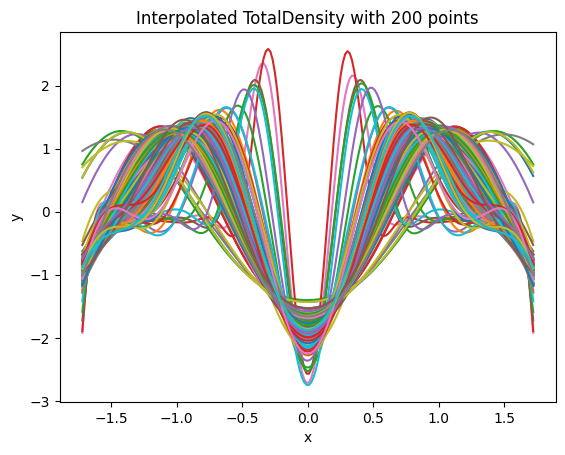

In [17]:
for index in range(0,200):
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity with 200 points')
plt.show()

In [4]:
names = []
for i in range(0,613):
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in range(0,613):
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.958379 -1.719098 -0.770701 -1.719098 -0.981001 -1.719098   
1   -1.701821 -0.904582 -1.701821 -0.681823 -1.701821 -0.914998 -1.701821   
2   -1.684543 -0.853731 -1.684543 -0.600108 -1.684543 -0.851049 -1.684543   
3   -1.667266 -0.805567 -1.667266 -0.525489 -1.667266 -0.788997 -1.667266   
4   -1.649989 -0.759802 -1.649989 -0.457838 -1.649989 -0.728671 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.759976  1.649989 -0.461557  1.649989 -0.728637  1.649989   
196  1.667266 -0.806157  1.667266 -0.529190  1.667266 -0.788998  1.667266   
197  1.684543 -0.854733  1.684543 -0.603799  1.684543 -0.851088  1.684543   
198  1.701821 -0.905986  1.701821 -0.685513  1.701821 -0.915078  1.701821   
199  1.719098 -0.960174  1.719098 -0.774398  1.719098 -0.981123  1.719098   

           3y        4x        4y  ...      608x      608y      609x  \
0   -0.903450 -1.719098 -0.905063  ... -1.719098 -0.895701 -1.719098   
1   -0.820895 -1.701821 -0.826098  ... -1.701821 -0.809139 -1.701821   
2   -0.744437 -1.684543 -0.750340  ... -1.684543 -0.730312 -1.684543   
3   -0.673929 -1.667266 -0.677635  ... -1.667266 -0.659202 -1.667266   
4   -0.609179 -1.649989 -0.607806  ... -1.649989 -0.595718 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.614287  1.649989 -0.606924  ...  1.649989 -0.599200  1.649989   
196 -0.679976  1.667266 -0.676546  ...  1.667266 -0.662541  1.667266   
197 -0.751408  1.684543 -0.749047  ...  1.684543 -0.733465  1.684543   
198 -0.828768  1.701821 -0.824602  ...  1.701821 -0.812070  1.701821   
199 -0.912196  1.719098 -0.903369  ...  1.719098 -0.898376  1.719098   

         609y      610x      610y      611x      611y      612x      612y  
0   -0.959931 -1.719098 -0.792077 -1.719098 -1.066885 -1.719098 -0.846791  
1   -0.879507 -1.701821 -0.707730 -1.701821 -0.965249 -1.701821 -0.786726  
2   -0.802576 -1.684543 -0.629905 -1.684543 -0.870834 -1.684543 -0.729481  
3   -0.728938 -1.667266 -0.558487 -1.667266 -0.783549 -1.667266 -0.674903  
4   -0.658374 -1.649989 -0.493307 -1.649989 -0.703239 -1.649989 -0.622820  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.648020  1.649989 -0.489258  1.649989 -0.701582  1.649989 -0.615859  
196 -0.719528  1.667266 -0.552892  1.667266 -0.783469  1.667266 -0.667706  
197 -0.794238  1.684543 -0.622831  1.684543 -0.872314  1.684543 -0.722061  
198 -0.872356  1.701821 -0.699258  1.701821 -0.968256  1.701821 -0.779095  
199 -0.954066  1.719098 -0.782297  1.719098 -1.071378  1.719098 -0.838962  

[200 rows x 1226 columns]

In [5]:
input_data = FF_df.iloc[: , :-3]
output_data = TD_df.iloc[: , :-6]

In [6]:
input_data

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       600       601       602  \
0   -0.309006 -0.349255  0.267737  ... -0.015755 -0.670520 -0.250014   
1   -0.309460 -0.349860  0.267305  ... -0.016233 -0.670950 -0.250566   
2   -0.310820 -0.351675  0.266009  ... -0.017669 -0.672240 -0.252221   
3   -0.313086 -0.354698  0.263851  ... -0.020061 -0.674390 -0.254978   
4   -0.316257 -0.358928  0.260830  ... -0.023408 -0.677398 -0.258837   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.765111 -0.743381 -0.669381   
996 -0.656542 -0.659345 -0.777468  ... -0.765019 -0.743575 -0.669735   
997 -0.656158 -0.662494 -0.777772  ... -0.764926 -0.743771 -0.670089   
998 -0.655810 -0.665672 -0.778070  ... -0.764833 -0.743970 -0.670442   
999 -0.655498 -0.668877 -0.778360  ... -0.764740 -0.744172 -0.670794   

          603       604       605       606       607       608       609  
0   -0.513892 -0.299718 -0.477219  0.087297 -0.142115  0.840006 -0.459976  
1   -0.514353 -0.299953 -0.477644  0.086667 -0.142717  0.839384 -0.460461  
2   -0.515734 -0.300657 -0.478919  0.084776 -0.144520  0.837520 -0.461915  
3   -0.518037 -0.301829 -0.481043  0.081625 -0.147525  0.834413 -0.464338  
4   -0.521258 -0.303470 -0.484016  0.077216 -0.151730  0.830066 -0.467729  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.857844 -0.764482 -0.705293 -0.861659 -0.689449 -0.738946 -0.677948  
996 -0.857907 -0.765611 -0.704952 -0.862931 -0.690513 -0.738721 -0.677956  
997 -0.857928 -0.766756 -0.704615 -0.864157 -0.691557 -0.738505 -0.678050  
998 -0.857907 -0.767919 -0.704282 -0.865337 -0.692583 -0.738300 -0.678230  
999 -0.857847 -0.769097 -0.703954 -0.866470 -0.693590 -0.738105 -0.678494  

[1000 rows x 610 columns]

In [7]:
output_data

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.958379 -1.719098 -0.770701 -1.719098 -0.981001 -1.719098   
1   -1.701821 -0.904582 -1.701821 -0.681823 -1.701821 -0.914998 -1.701821   
2   -1.684543 -0.853731 -1.684543 -0.600108 -1.684543 -0.851049 -1.684543   
3   -1.667266 -0.805567 -1.667266 -0.525489 -1.667266 -0.788997 -1.667266   
4   -1.649989 -0.759802 -1.649989 -0.457838 -1.649989 -0.728671 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.759976  1.649989 -0.461557  1.649989 -0.728637  1.649989   
196  1.667266 -0.806157  1.667266 -0.529190  1.667266 -0.788998  1.667266   
197  1.684543 -0.854733  1.684543 -0.603799  1.684543 -0.851088  1.684543   
198  1.701821 -0.905986  1.701821 -0.685513  1.701821 -0.915078  1.701821   
199  1.719098 -0.960174  1.719098 -0.774398  1.719098 -0.981123  1.719098   

           3y        4x        4y  ...      605x      605y      606x  \
0   -0.903450 -1.719098 -0.905063  ... -1.719098 -0.808506 -1.719098   
1   -0.820895 -1.701821 -0.826098  ... -1.701821 -0.704143 -1.701821   
2   -0.744437 -1.684543 -0.750340  ... -1.684543 -0.608018 -1.684543   
3   -0.673929 -1.667266 -0.677635  ... -1.667266 -0.520162 -1.667266   
4   -0.609179 -1.649989 -0.607806  ... -1.649989 -0.440537 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.614287  1.649989 -0.606924  ...  1.649989 -0.441054  1.649989   
196 -0.679976  1.667266 -0.676546  ...  1.667266 -0.520602  1.667266   
197 -0.751408  1.684543 -0.749047  ...  1.684543 -0.608376  1.684543   
198 -0.828768  1.701821 -0.824602  ...  1.701821 -0.704416  1.701821   
199 -0.912196  1.719098 -0.903369  ...  1.719098 -0.808690  1.719098   

         606y      607x      607y      608x      608y      609x      609y  
0   -0.992527 -1.719098 -1.172940 -1.719098 -0.895701 -1.719098 -0.959931  
1   -0.910245 -1.701821 -0.991107 -1.701821 -0.809139 -1.701821 -0.879507  
2   -0.832390 -1.684543 -0.822537 -1.684543 -0.730312 -1.684543 -0.802576  
3   -0.758771 -1.667266 -0.667669 -1.667266 -0.659202 -1.667266 -0.728938  
4   -0.689161 -1.649989 -0.526809 -1.649989 -0.595718 -1.649989 -0.658374  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.690790  1.649989 -0.527034  1.649989 -0.599200  1.649989 -0.648020  
196 -0.760579  1.667266 -0.667970  1.667266 -0.662541  1.667266 -0.719528  
197 -0.834342  1.684543 -0.822913  1.684543 -0.733465  1.684543 -0.794238  
198 -0.912309  1.701821 -0.991557  1.701821 -0.812070  1.701821 -0.872356  
199 -0.994669  1.719098 -1.173462  1.719098 -0.898376  1.719098 -0.954066  

[200 rows x 1220 columns]

In [8]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[114, 25, 281, 250, 228, 142, 104, 558, 89, 432, 32, 30, 95, 223, 238, 517, 27, 574, 203, 602, 429, 225, 459, 284, 6, 163, 600, 348, 586, 159, 220, 344, 603, 94, 389, 99, 367, 352, 270, 44, 470, 549, 127, 387, 80, 300, 370, 196, 71, 46, 233, 296, 81, 595, 103, 575, 581, 464, 373, 166, 379, 363, 214, 273, 73, 175, 606, 167, 473, 388, 276, 224, 332, 57, 234, 599, 323, 410, 274, 67, 216, 322, 217, 511, 405, 469, 146, 271, 604, 252, 269, 438, 408, 563, 538, 141, 505, 93, 48, 440, 56, 78, 321, 557, 525, 582, 529, 305, 534, 197, 195, 502, 239, 571, 128, 283, 510, 482, 5, 504, 369, 58, 349, 453, 531, 384, 136, 393, 328, 174, 536, 150, 222, 565, 232, 1, 489, 448, 368, 134, 256, 390, 91, 259, 54, 445, 320, 152, 430, 327, 466, 311, 101, 508, 191, 468, 82, 539, 398, 522, 0, 306, 165, 543, 9, 479, 185, 425, 413, 157, 122, 29, 123, 290, 40, 43, 374, 248, 417, 35, 554, 272, 392, 64, 65, 337, 243, 607, 84, 135, 496, 310, 503, 108, 452, 386, 551, 353, 102, 365, 580, 204, 343, 537, 455, 515, 264, 231, 

In [9]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [10]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 400, 1)
(122, 1000)
(122, 400, 1)


In [37]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_input_values, train_output_values, batch_size=50, epochs=500, validation_split=0.2)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_8 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_9 (Dense)             (None, 1500)              3001500   
                                                                 
 dense_10 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_11 (Dense)            (None, 500)               500500    
                                                                 
 dense_12 (Dense)            (None, 400)               200400    
                                                                 
Total params: 7,205,400
Trainable params: 7,205,400
Non-tra

8/8 [==============================] - 1s 129ms/step - loss: 0.0158 - val_loss: 0.0254
Epoch 154/500
8/8 [==============================] - 1s 107ms/step - loss: 0.0163 - val_loss: 0.0239
Epoch 155/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0166 - val_loss: 0.0265
Epoch 156/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0166 - val_loss: 0.0217
Epoch 157/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0160 - val_loss: 0.0258
Epoch 158/500
8/8 [==============================] - 1s 101ms/step - loss: 0.0161 - val_loss: 0.0243
Epoch 159/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0152 - val_loss: 0.0212
Epoch 160/500
8/8 [==============================] - 1s 108ms/step - loss: 0.0147 - val_loss: 0.0274
Epoch 161/500
8/8 [==============================] - 1s 103ms/step - loss: 0.0152 - val_loss: 0.0196
Epoch 162/500
8/8 [==============================] - 1s 105ms/step - loss: 0.0139 - val_loss: 0.0248
Epoc

Epoch 235/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0103 - val_loss: 0.0252
Epoch 236/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0113 - val_loss: 0.0232
Epoch 237/500
8/8 [==============================] - 1s 101ms/step - loss: 0.0122 - val_loss: 0.0211
Epoch 238/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0104 - val_loss: 0.0226
Epoch 239/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0090 - val_loss: 0.0237
Epoch 240/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0093 - val_loss: 0.0233
Epoch 241/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0094 - val_loss: 0.0217
Epoch 242/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0088 - val_loss: 0.0225
Epoch 243/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0089 - val_loss: 0.0208
Epoch 244/500
8/8 [==============================] - 1s 100ms/step - loss: 0.0106 - val_loss: 0.023

Epoch 317/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0076 - val_loss: 0.0205
Epoch 318/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0069 - val_loss: 0.0207
Epoch 319/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0064 - val_loss: 0.0204
Epoch 320/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0062 - val_loss: 0.0259
Epoch 321/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0058 - val_loss: 0.0222
Epoch 322/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0057 - val_loss: 0.0216
Epoch 323/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0051 - val_loss: 0.0203
Epoch 324/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0054 - val_loss: 0.0223
Epoch 325/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0048 - val_loss: 0.0199
Epoch 326/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0060 - val_loss: 0.0217


Epoch 399/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0049 - val_loss: 0.0216
Epoch 400/500
8/8 [==============================] - 1s 96ms/step - loss: 0.0039 - val_loss: 0.0204
Epoch 401/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0041 - val_loss: 0.0199
Epoch 402/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0043 - val_loss: 0.0205
Epoch 403/500
8/8 [==============================] - 1s 96ms/step - loss: 0.0035 - val_loss: 0.0219
Epoch 404/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0035 - val_loss: 0.0195
Epoch 405/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0030 - val_loss: 0.0212
Epoch 406/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0030 - val_loss: 0.0187
Epoch 407/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0026 - val_loss: 0.0205
Epoch 408/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0024 - val_loss: 0.0196


In [38]:
prediction = model.predict(test_input_values)

index = 0
distance_average_sum = 0
for data in prediction:
    p_x = data[0:200]
    p_y = data[200:]
    t_x = test_output_values[index][0:200].tolist()
    t_y = test_output_values[index][200:].tolist()
    
    distance_sum = 0
    for i in range(0,200):
        distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
    
    distance_average_sum = distance_average_sum + distance_sum/200
    
MSE = distance_average_sum/len(prediction)
print(MSE)

4/4 [==============================] - 0s 11ms/step
0.2165282678078006


4/4 [==============================] - 0s 10ms/step


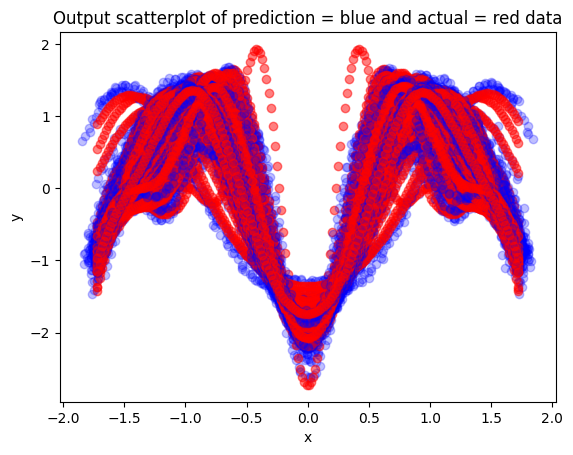

In [39]:
index = 0
for points in model.predict(test_input_values):
    p_x = points[0:200]
    p_y = points[200:]
    plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
    t_x = test_output_values[index][0:200].tolist()
    t_y = test_output_values[index][200:].tolist()
    plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
    index = index + 1

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output scatterplot of prediction = blue and actual = red data')
plt.show()

4/4 [==============================] - 0s 11ms/step


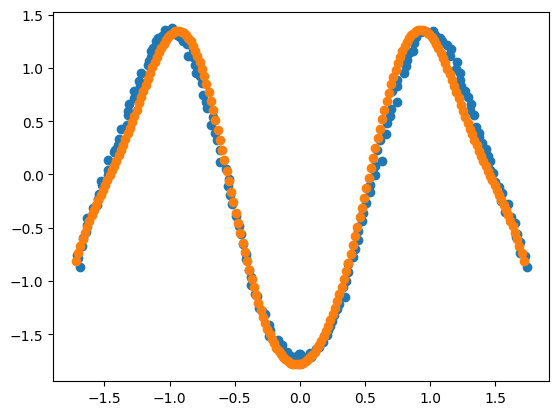

In [40]:
prediction = model.predict(test_input_values)
x_1 = prediction[0][0:200]
y_1 = prediction[0][200:]
plt.scatter(x_1,y_1)

x_2 = test_output_values[0][0:200]
y_2 = test_output_values[0][200:]
plt.scatter(x_2,y_2)
plt.show()

4/4 [==============================] - 0s 10ms/step


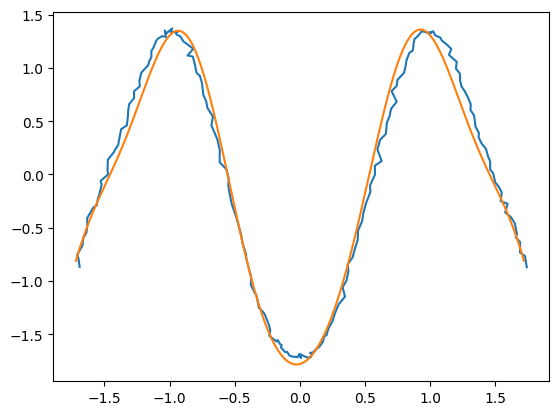

In [41]:
prediction = model.predict(test_input_values)
x_1 = prediction[0][0:200]
y_1 = prediction[0][200:]
plt.plot(x_1,y_1)

x_2 = test_output_values[0][0:200]
y_2 = test_output_values[0][200:]
plt.plot(x_2,y_2)
plt.show()

In [45]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
%load_ext tensorboard
log_folder = 'logs'

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_13 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_14 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_15 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_16 (Dense)            (None, 500)               500500    
                                                                 
 dense_17 (Dense)            (None, 400)               200400    
                                                                 
Total params: 7,205,400
Trainable params: 7,205,400
Non-tra

In [47]:
from tensorflow.keras.callbacks import TensorBoard
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]
model.fit(train_input_values, train_output_values, batch_size=50, epochs=300, validation_split=0.2,callbacks=callbacks)

Epoch 1/300
8/8 [==============================] - 7s 821ms/step - loss: 0.4781 - val_loss: 0.0834
Epoch 2/300
8/8 [==============================] - 4s 598ms/step - loss: 0.0933 - val_loss: 0.0688
Epoch 3/300
8/8 [==============================] - 5s 693ms/step - loss: 0.0776 - val_loss: 0.0549
Epoch 4/300
8/8 [==============================] - 4s 622ms/step - loss: 0.0688 - val_loss: 0.0508
Epoch 5/300
8/8 [==============================] - 5s 649ms/step - loss: 0.0654 - val_loss: 0.0467
Epoch 6/300
8/8 [==============================] - 5s 761ms/step - loss: 0.0647 - val_loss: 0.0475
Epoch 7/300
8/8 [==============================] - 5s 705ms/step - loss: 0.0624 - val_loss: 0.0457
Epoch 8/300
8/8 [==============================] - 5s 713ms/step - loss: 0.0601 - val_loss: 0.0465
Epoch 9/300
8/8 [==============================] - 5s 685ms/step - loss: 0.0577 - val_loss: 0.0421
Epoch 10/300
8/8 [==============================] - 5s 630ms/step - loss: 0.0557 - val_loss: 0.0390
Epoch 11/

8/8 [==============================] - 5s 681ms/step - loss: 0.0302 - val_loss: 0.0303
Epoch 84/300
8/8 [==============================] - 5s 754ms/step - loss: 0.0308 - val_loss: 0.0272
Epoch 85/300
8/8 [==============================] - 6s 838ms/step - loss: 0.0277 - val_loss: 0.0259
Epoch 86/300
8/8 [==============================] - 6s 830ms/step - loss: 0.0260 - val_loss: 0.0270
Epoch 87/300
8/8 [==============================] - 6s 849ms/step - loss: 0.0259 - val_loss: 0.0263
Epoch 88/300
8/8 [==============================] - 6s 787ms/step - loss: 0.0313 - val_loss: 0.0306
Epoch 89/300
8/8 [==============================] - 6s 786ms/step - loss: 0.0274 - val_loss: 0.0279
Epoch 90/300
8/8 [==============================] - 5s 727ms/step - loss: 0.0287 - val_loss: 0.0258
Epoch 91/300
8/8 [==============================] - 7s 961ms/step - loss: 0.0331 - val_loss: 0.0283
Epoch 92/300
8/8 [==============================] - 6s 861ms/step - loss: 0.0331 - val_loss: 0.0253
Epoch 93/300


8/8 [==============================] - 5s 751ms/step - loss: 0.0070 - val_loss: 0.0298
Epoch 246/300
8/8 [==============================] - 4s 627ms/step - loss: 0.0080 - val_loss: 0.0265
Epoch 247/300
8/8 [==============================] - 4s 621ms/step - loss: 0.0104 - val_loss: 0.0269
Epoch 248/300
8/8 [==============================] - 5s 639ms/step - loss: 0.0090 - val_loss: 0.0277
Epoch 249/300
8/8 [==============================] - 5s 646ms/step - loss: 0.0084 - val_loss: 0.0261
Epoch 250/300
8/8 [==============================] - 6s 777ms/step - loss: 0.0079 - val_loss: 0.0254
Epoch 251/300
8/8 [==============================] - 5s 655ms/step - loss: 0.0072 - val_loss: 0.0338
Epoch 252/300
8/8 [==============================] - 4s 594ms/step - loss: 0.0092 - val_loss: 0.0283
Epoch 253/300
8/8 [==============================] - 5s 738ms/step - loss: 0.0128 - val_loss: 0.0248
Epoch 254/300
8/8 [==============================] - 5s 639ms/step - loss: 0.0108 - val_loss: 0.0253
Epoc

In [11]:
def MSE(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]

        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)

        distance_average_sum = distance_average_sum + distance_sum/length

    return distance_average_sum/len(prediction)

def Plots(actual,prediction):
    length = int(len(prediction[0])/2)
    
    prediction = model.predict(test_input_values)
    x_1 = prediction[0][0:length]
    y_1 = prediction[0][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = test_output_values[0][0:length]
    y_2 = test_output_values[0][length:]
    plt.plot(x_2,y_2,c='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the first prediction = blue and actual = red')
    plt.show()
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction = blue and actual = red data')
    plt.show()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_37 (Dense)            (None, 800)               800800    
                                                                 
 dense_38 (Dense)            (None, 800)               640800    
                                                                 
 dense_39 (Dense)            (None, 400)               320400    
                                                                 
Total params: 1,762,000
Trainable params: 1,762,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 2s 183ms/step - loss: 0.4761 - val_loss: 0.0965
Epoch 2/100
7/7 [==============================] - 0s 61ms/step - loss: 0.1006 - 

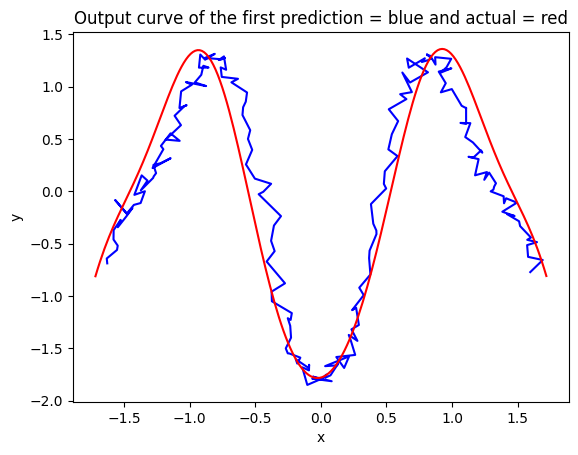

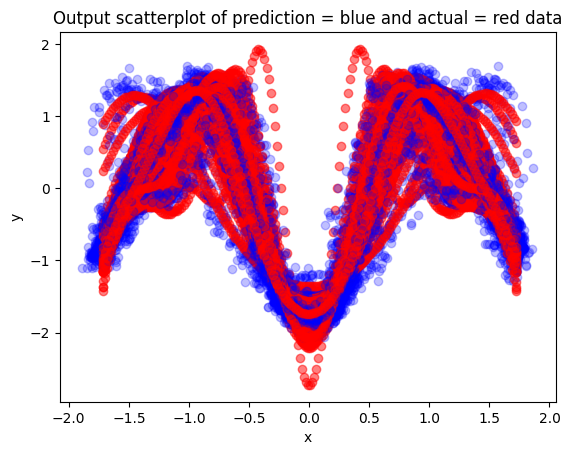

In [69]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(800, activation="relu")(inputs)
x = layers.Dense(800, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_40 (Dense)            (None, 800)               800800    
                                                                 
 dense_41 (Dense)            (None, 800)               640800    
                                                                 
 dense_42 (Dense)            (None, 400)               320400    
                                                                 
Total params: 1,762,000
Trainable params: 1,762,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 2s 175ms/step - loss: 0.4693 - val_loss: 0.1256
Epoch 2/100
7/7 [==============================] - 0s 70ms/step - loss: 0.1160 - 

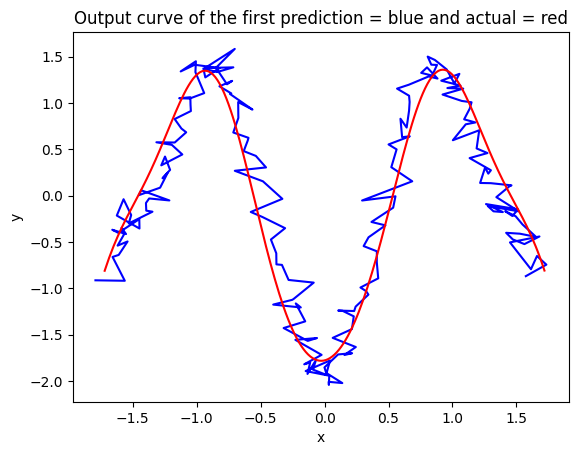

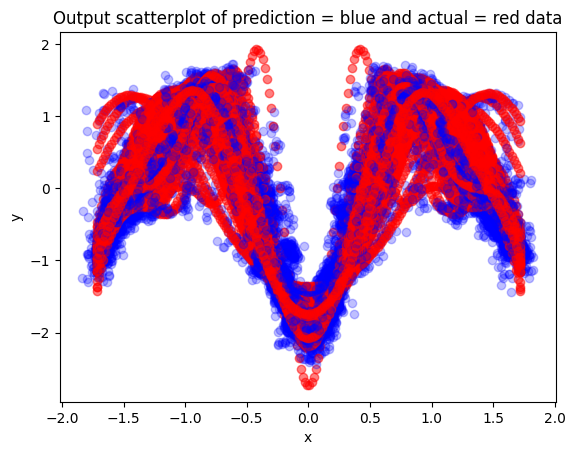

In [70]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(800, activation="tanh")(inputs)
x = layers.Dense(800, activation="tanh")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_43 (Dense)            (None, 800)               800800    
                                                                 
 dense_44 (Dense)            (None, 800)               640800    
                                                                 
 dense_45 (Dense)            (None, 400)               320400    
                                                                 
Total params: 1,762,000
Trainable params: 1,762,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 3s 282ms/step - loss: 0.4544 - val_loss: 0.1305
Epoch 2/100
7/7 [==============================] - 1s 81ms/step - loss: 0.1158 - 

7/7 [==============================] - 0s 66ms/step - loss: 0.0426 - val_loss: 0.0301
Epoch 75/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0425 - val_loss: 0.0330
Epoch 76/100
7/7 [==============================] - 0s 57ms/step - loss: 0.0459 - val_loss: 0.0358
Epoch 77/100
7/7 [==============================] - 0s 52ms/step - loss: 0.0430 - val_loss: 0.0378
Epoch 78/100
7/7 [==============================] - 0s 61ms/step - loss: 0.0422 - val_loss: 0.0312
Epoch 79/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0394 - val_loss: 0.0378
Epoch 80/100
7/7 [==============================] - 0s 59ms/step - loss: 0.0451 - val_loss: 0.0368
Epoch 81/100
7/7 [==============================] - 1s 121ms/step - loss: 0.0421 - val_loss: 0.0378
Epoch 82/100
7/7 [==============================] - 0s 60ms/step - loss: 0.0436 - val_loss: 0.0284
Epoch 83/100
7/7 [==============================] - 0s 65ms/step - loss: 0.0403 - val_loss: 0.0298
Epoch 84/100
7/7 [====

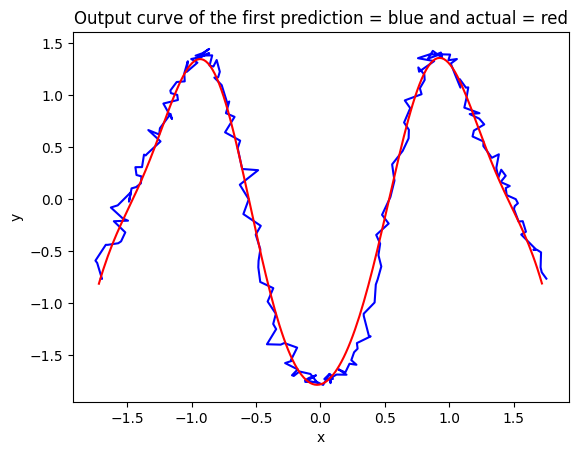

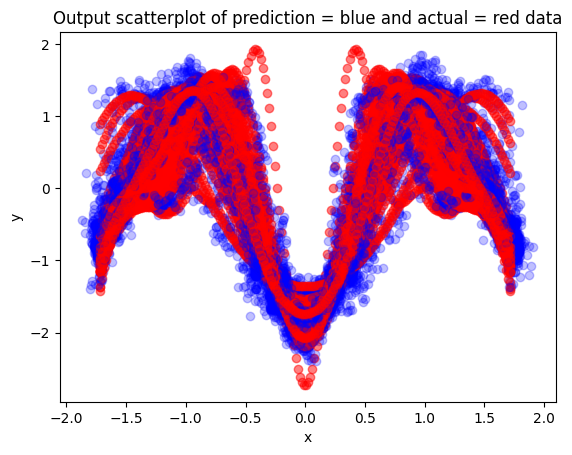

In [71]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(800, activation="relu")(inputs)
x = layers.Dense(800, activation="tanh")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_46 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_47 (Dense)            (None, 1500)              4501500   
                                                                 
 dense_48 (Dense)            (None, 400)               600400    
                                                                 
Total params: 8,104,900
Trainable params: 8,104,900
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 3s 404ms/step - loss: 0.7586 - val_loss: 0.1642
Epoch 2/100
7/7 [==============================] - 1s 131ms/step - loss: 0.1669 -

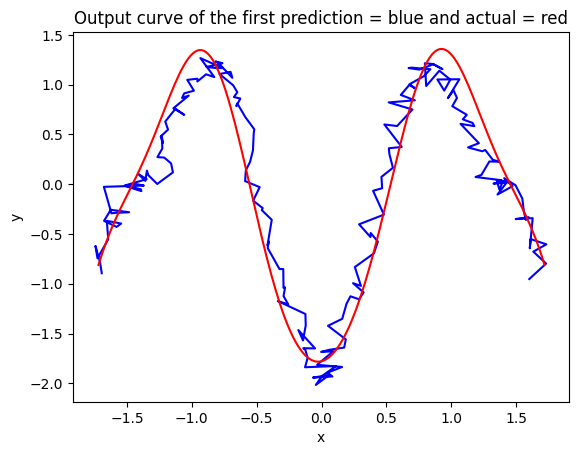

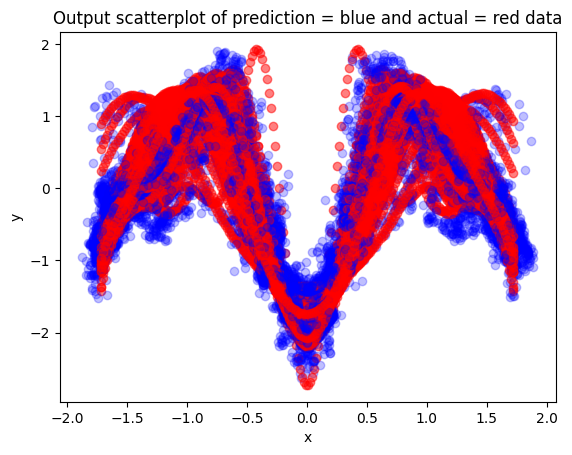

In [72]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(1500, activation="tanh")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_49 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_50 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_51 (Dense)            (None, 400)               400400    
                                                                 
Total params: 2,402,400
Trainable params: 2,402,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 2s 150ms/step - loss: 0.4310 - val_loss: 0.0901
Epoch 2/100
7/7 [==============================] - 0s 61ms/step - loss: 0.0917 - 

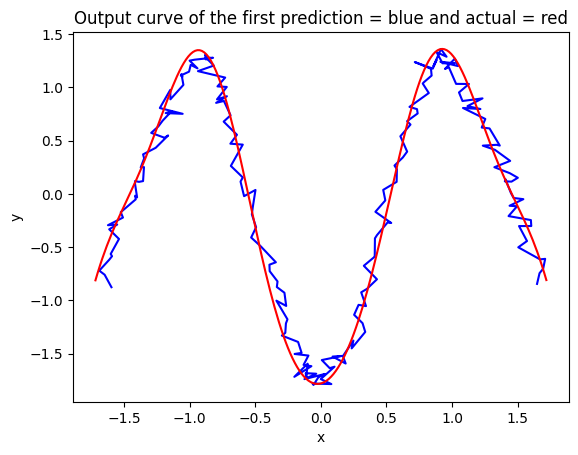

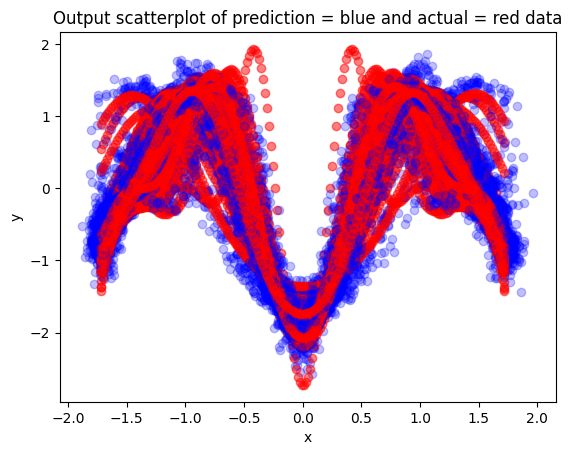

In [73]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_52 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_53 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_54 (Dense)            (None, 400)               400400    
                                                                 
Total params: 2,402,400
Trainable params: 2,402,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================]

Epoch 73/100
7/7 [==============================] - 0s 54ms/step - loss: 0.0463 - val_loss: 0.0366
Epoch 74/100
7/7 [==============================] - 0s 51ms/step - loss: 0.0500 - val_loss: 0.0358
Epoch 75/100
7/7 [==============================] - 0s 53ms/step - loss: 0.0482 - val_loss: 0.0374
Epoch 76/100
7/7 [==============================] - 0s 50ms/step - loss: 0.0439 - val_loss: 0.0340
Epoch 77/100
7/7 [==============================] - 0s 52ms/step - loss: 0.0444 - val_loss: 0.0336
Epoch 78/100
7/7 [==============================] - 0s 52ms/step - loss: 0.0460 - val_loss: 0.0293
Epoch 79/100
7/7 [==============================] - 0s 52ms/step - loss: 0.0469 - val_loss: 0.0337
Epoch 80/100
7/7 [==============================] - 0s 51ms/step - loss: 0.0482 - val_loss: 0.0316
Epoch 81/100
7/7 [==============================] - 1s 114ms/step - loss: 0.0457 - val_loss: 0.0360
Epoch 82/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0466 - val_loss: 0.0343
Epoch 83/

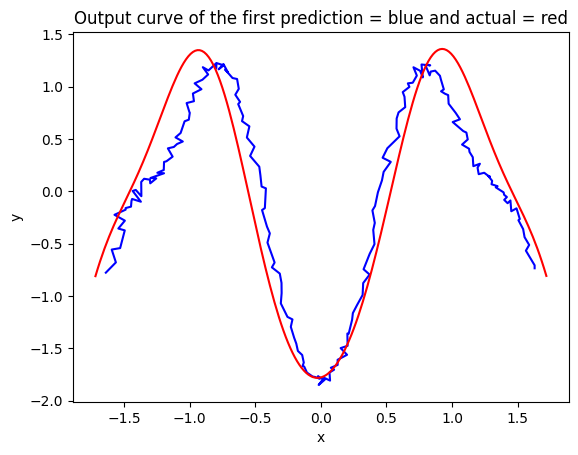

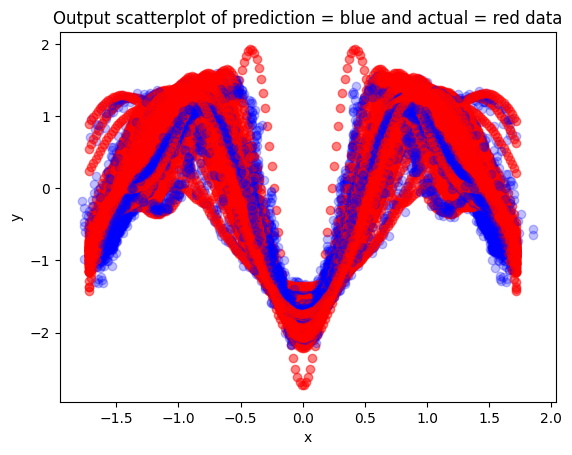

In [74]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dropout(0.2, noise_shape = None, seed = 42)(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_55 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_56 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_57 (Dense)            (None, 400)               400400    
                                                                 
Total params: 2,402,400
Trainable params: 2,402,400
Non-tr

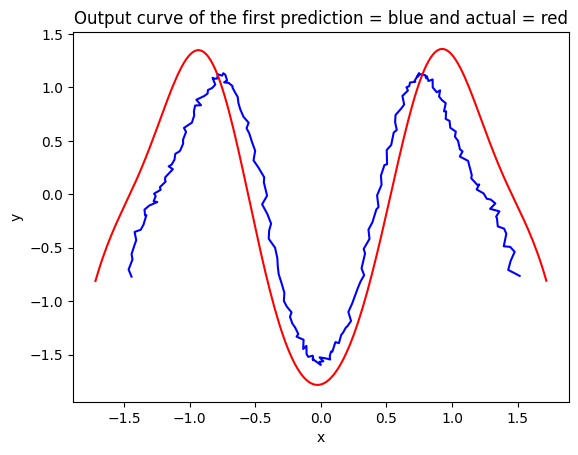

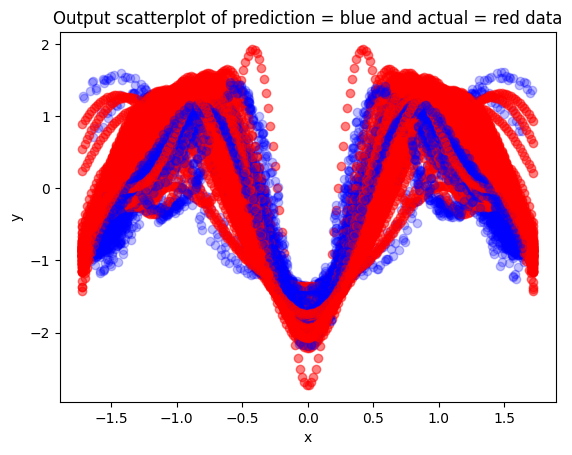

In [75]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dropout(0.2, noise_shape = None, seed = 42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.2, noise_shape = None, seed = 42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_58 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_60 (Dense)            (None, 400)               400400    
                                                                 
Total params: 2,402,400
Trainable params: 2,402,400
Non-tr

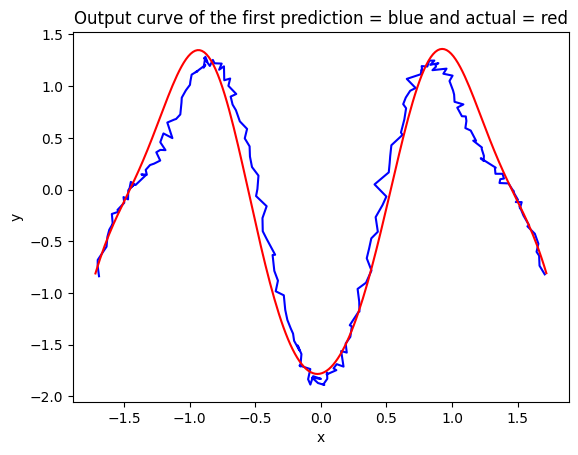

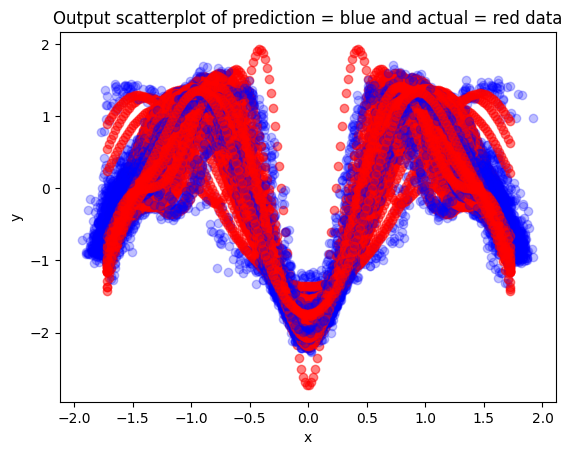

In [76]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_61 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_62 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_63 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_64 (Dense)            (None, 400)               800400    
                                                                 
Total params: 10,806,400
Trainable params: 10,806,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [=============================

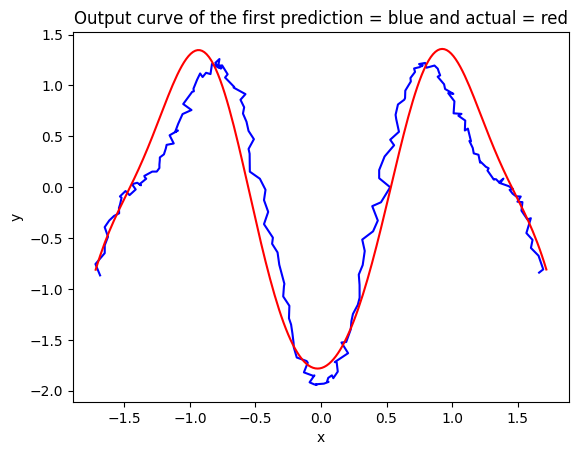

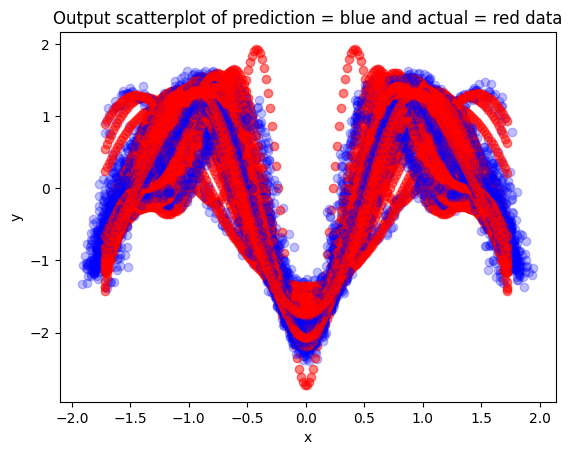

In [77]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [TensorBoard(log_dir='model_1_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]
model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_65 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_66 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_67 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_68 (Dense)            (None, 400)               800400    
                                                                 
Total params: 10,806,400
Trainable params: 10,806,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [=============================

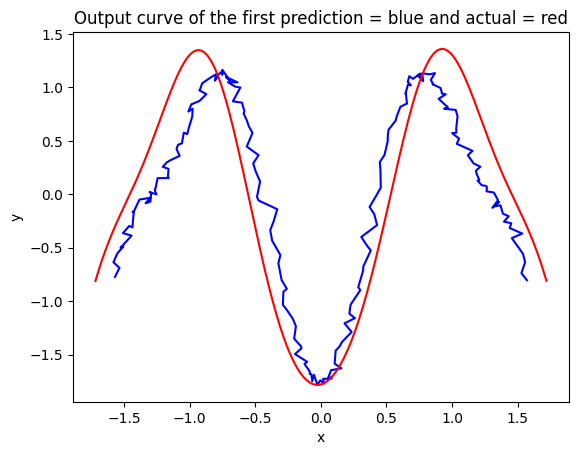

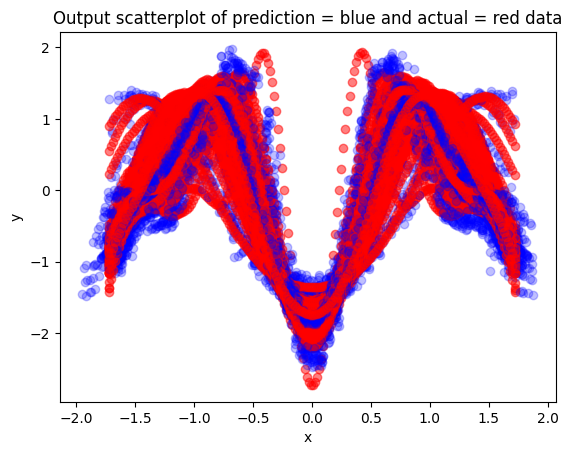

In [78]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_69 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_70 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_71 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_72 (Dense)            (None, 500)               500500    
                                                                 
 dense_73 (Dense)            (None, 400)               200400    
                                                                 
Total params: 7,205,400
Trainable params: 7,205,400
Non-tr

Epoch 71/100
7/7 [==============================] - 1s 181ms/step - loss: 0.0393 - val_loss: 0.0358
Epoch 72/100
7/7 [==============================] - 1s 191ms/step - loss: 0.0377 - val_loss: 0.0272
Epoch 73/100
7/7 [==============================] - 1s 186ms/step - loss: 0.0373 - val_loss: 0.0293
Epoch 74/100
7/7 [==============================] - 1s 185ms/step - loss: 0.0353 - val_loss: 0.0279
Epoch 75/100
7/7 [==============================] - 1s 184ms/step - loss: 0.0367 - val_loss: 0.0288
Epoch 76/100
7/7 [==============================] - 1s 198ms/step - loss: 0.0355 - val_loss: 0.0295
Epoch 77/100
7/7 [==============================] - 1s 174ms/step - loss: 0.0350 - val_loss: 0.0272
Epoch 78/100
7/7 [==============================] - 1s 186ms/step - loss: 0.0349 - val_loss: 0.0270
Epoch 79/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0356 - val_loss: 0.0312
Epoch 80/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0342 - val_loss: 0.0266


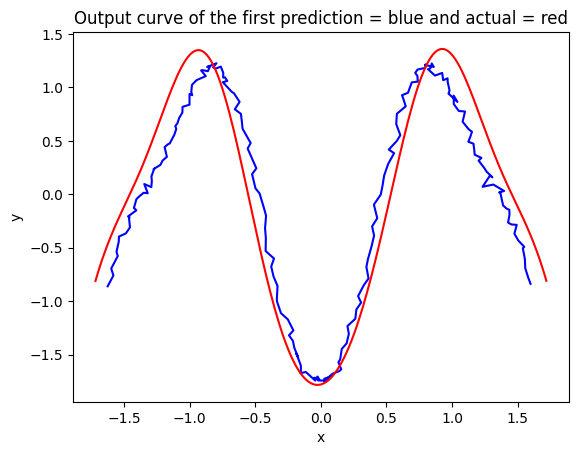

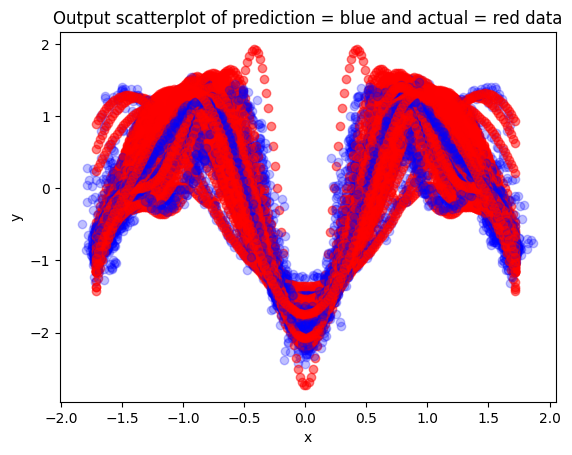

In [79]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              2002000   
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 dense_2 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 400)               200400    
                                                                 
Total params: 7,205,400
Trainable params: 7,205,400
Non-train

Epoch 71/500
7/7 [==============================] - 1s 101ms/step - loss: 0.0386 - val_loss: 0.0357
Epoch 72/500
7/7 [==============================] - 1s 102ms/step - loss: 0.0366 - val_loss: 0.0292
Epoch 73/500
7/7 [==============================] - 1s 121ms/step - loss: 0.0415 - val_loss: 0.0494
Epoch 74/500
7/7 [==============================] - 1s 136ms/step - loss: 0.0423 - val_loss: 0.0290
Epoch 75/500
7/7 [==============================] - 1s 106ms/step - loss: 0.0414 - val_loss: 0.0305
Epoch 76/500
7/7 [==============================] - 1s 100ms/step - loss: 0.0411 - val_loss: 0.0363
Epoch 77/500
7/7 [==============================] - 1s 102ms/step - loss: 0.0395 - val_loss: 0.0381
Epoch 78/500
7/7 [==============================] - 1s 125ms/step - loss: 0.0438 - val_loss: 0.0362
Epoch 79/500
7/7 [==============================] - 1s 113ms/step - loss: 0.0429 - val_loss: 0.0386
Epoch 80/500
7/7 [==============================] - 1s 132ms/step - loss: 0.0430 - val_loss: 0.0383


7/7 [==============================] - 1s 98ms/step - loss: 0.0258 - val_loss: 0.0364
Epoch 234/500
7/7 [==============================] - 1s 99ms/step - loss: 0.0293 - val_loss: 0.0257
Epoch 235/500
7/7 [==============================] - 1s 103ms/step - loss: 0.0276 - val_loss: 0.0320
Epoch 236/500
7/7 [==============================] - 1s 99ms/step - loss: 0.0257 - val_loss: 0.0278
Epoch 237/500
7/7 [==============================] - 1s 103ms/step - loss: 0.0273 - val_loss: 0.0351
Epoch 238/500
7/7 [==============================] - 1s 106ms/step - loss: 0.0326 - val_loss: 0.0312
Epoch 239/500
7/7 [==============================] - 1s 101ms/step - loss: 0.0280 - val_loss: 0.0274
Epoch 240/500
7/7 [==============================] - 1s 109ms/step - loss: 0.0275 - val_loss: 0.0277
Epoch 241/500
7/7 [==============================] - 1s 108ms/step - loss: 0.0247 - val_loss: 0.0255
Epoch 242/500
7/7 [==============================] - 1s 104ms/step - loss: 0.0228 - val_loss: 0.0262
Epoch 2

7/7 [==============================] - 1s 108ms/step - loss: 0.0151 - val_loss: 0.0258
Epoch 396/500
7/7 [==============================] - 1s 108ms/step - loss: 0.0162 - val_loss: 0.0283
Epoch 397/500
7/7 [==============================] - 1s 101ms/step - loss: 0.0137 - val_loss: 0.0254
Epoch 398/500
7/7 [==============================] - 1s 102ms/step - loss: 0.0128 - val_loss: 0.0281
Epoch 399/500
7/7 [==============================] - 1s 98ms/step - loss: 0.0137 - val_loss: 0.0287
Epoch 400/500
7/7 [==============================] - 1s 102ms/step - loss: 0.0132 - val_loss: 0.0237
Epoch 401/500
7/7 [==============================] - 1s 114ms/step - loss: 0.0140 - val_loss: 0.0407
Epoch 402/500
7/7 [==============================] - 1s 107ms/step - loss: 0.0246 - val_loss: 0.0289
Epoch 403/500
7/7 [==============================] - 1s 135ms/step - loss: 0.0295 - val_loss: 0.0247
Epoch 404/500
7/7 [==============================] - 1s 117ms/step - loss: 0.0257 - val_loss: 0.0250
Epoch

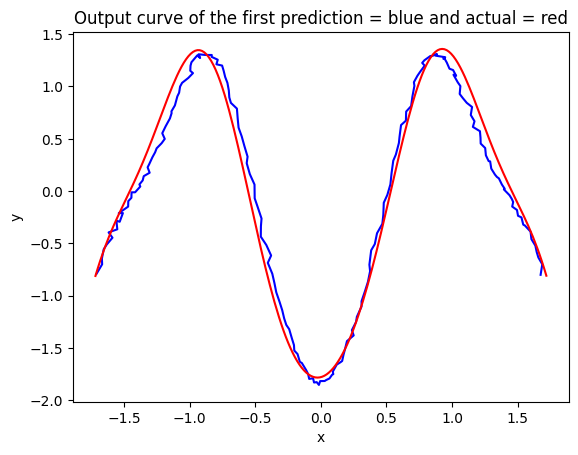

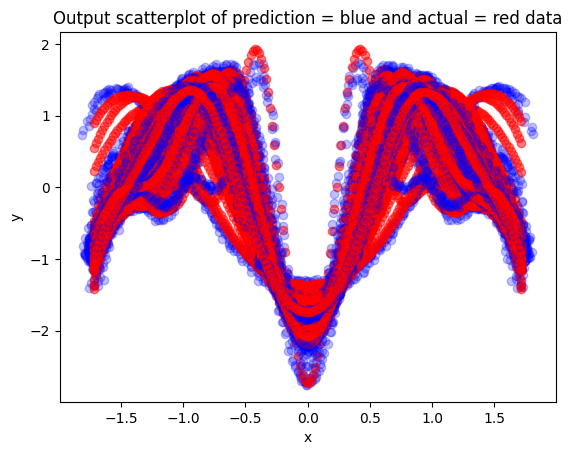

In [12]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_6 (Dense)             (None, 2000)              4002000   
                                                                 
 dense_7 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_9 (Dense)             (None, 400)               400400    
                                                                 
Total params: 9,406,400
Trainable params: 9,406,400
Non-tra

Epoch 151/1000
7/7 [==============================] - 1s 126ms/step - loss: 0.0326 - val_loss: 0.0268
Epoch 152/1000
7/7 [==============================] - 1s 125ms/step - loss: 0.0311 - val_loss: 0.0329
Epoch 153/1000
7/7 [==============================] - 1s 124ms/step - loss: 0.0347 - val_loss: 0.0306
Epoch 154/1000
7/7 [==============================] - 1s 126ms/step - loss: 0.0341 - val_loss: 0.0436
Epoch 155/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0392 - val_loss: 0.0382
Epoch 156/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0377 - val_loss: 0.0289
Epoch 157/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.0312 - val_loss: 0.0460
Epoch 158/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0589 - val_loss: 0.0395
Epoch 159/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0493 - val_loss: 0.0423
Epoch 160/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0490

7/7 [==============================] - 1s 127ms/step - loss: 0.0121 - val_loss: 0.0224
Epoch 312/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0115 - val_loss: 0.0238
Epoch 313/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0141 - val_loss: 0.0245
Epoch 314/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0153 - val_loss: 0.0334
Epoch 315/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0213 - val_loss: 0.0233
Epoch 316/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0220 - val_loss: 0.0291
Epoch 317/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0203 - val_loss: 0.0225
Epoch 318/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0182 - val_loss: 0.0244
Epoch 319/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0175 - val_loss: 0.0241
Epoch 320/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0151 - val_loss: 0.

7/7 [==============================] - 1s 152ms/step - loss: 0.0163 - val_loss: 0.0214
Epoch 472/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0139 - val_loss: 0.0256
Epoch 473/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0152 - val_loss: 0.0199
Epoch 474/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0138 - val_loss: 0.0228
Epoch 475/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0125 - val_loss: 0.0240
Epoch 476/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.0120 - val_loss: 0.0355
Epoch 477/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.0122 - val_loss: 0.0231
Epoch 478/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0124 - val_loss: 0.0307
Epoch 479/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0130 - val_loss: 0.0218
Epoch 480/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0153 - val_loss: 0.

7/7 [==============================] - 1s 141ms/step - loss: 0.0027 - val_loss: 0.0247
Epoch 632/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.0024 - val_loss: 0.0245
Epoch 633/1000
7/7 [==============================] - 1s 123ms/step - loss: 0.0024 - val_loss: 0.0266
Epoch 634/1000
7/7 [==============================] - 1s 125ms/step - loss: 0.0025 - val_loss: 0.0261
Epoch 635/1000
7/7 [==============================] - 1s 126ms/step - loss: 0.0024 - val_loss: 0.0264
Epoch 636/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0022 - val_loss: 0.0265
Epoch 637/1000
7/7 [==============================] - 1s 145ms/step - loss: 0.0024 - val_loss: 0.0278
Epoch 638/1000
7/7 [==============================] - 1s 125ms/step - loss: 0.0023 - val_loss: 0.0268
Epoch 639/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0021 - val_loss: 0.0273
Epoch 640/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0021 - val_loss: 0.

7/7 [==============================] - 1s 136ms/step - loss: 0.0072 - val_loss: 0.0270
Epoch 792/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0094 - val_loss: 0.0277
Epoch 793/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0121 - val_loss: 0.0223
Epoch 794/1000
7/7 [==============================] - 1s 125ms/step - loss: 0.0103 - val_loss: 0.0213
Epoch 795/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0075 - val_loss: 0.0279
Epoch 796/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0068 - val_loss: 0.0283
Epoch 797/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0068 - val_loss: 0.0220
Epoch 798/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0070 - val_loss: 0.0246
Epoch 799/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0066 - val_loss: 0.0265
Epoch 800/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0066 - val_loss: 0.

7/7 [==============================] - 1s 141ms/step - loss: 0.0048 - val_loss: 0.0266
Epoch 950/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0048 - val_loss: 0.0257
Epoch 951/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0060 - val_loss: 0.0241
Epoch 952/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.0046 - val_loss: 0.0297
Epoch 953/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.0037 - val_loss: 0.0230
Epoch 954/1000
7/7 [==============================] - 1s 170ms/step - loss: 0.0032 - val_loss: 0.0247
Epoch 955/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.0049 - val_loss: 0.0247
Epoch 956/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.0043 - val_loss: 0.0231
Epoch 957/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.0038 - val_loss: 0.0234
Epoch 958/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0026 - val_loss: 0.

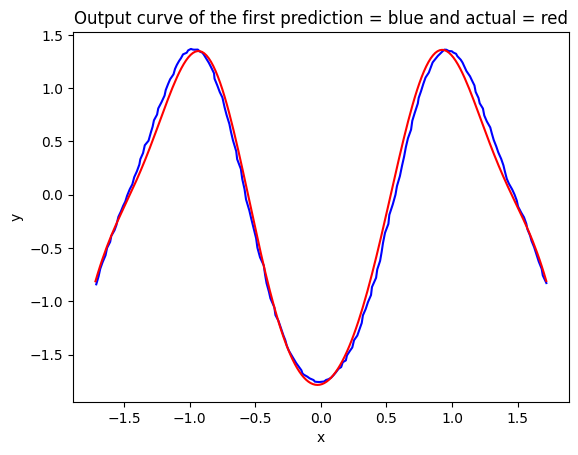

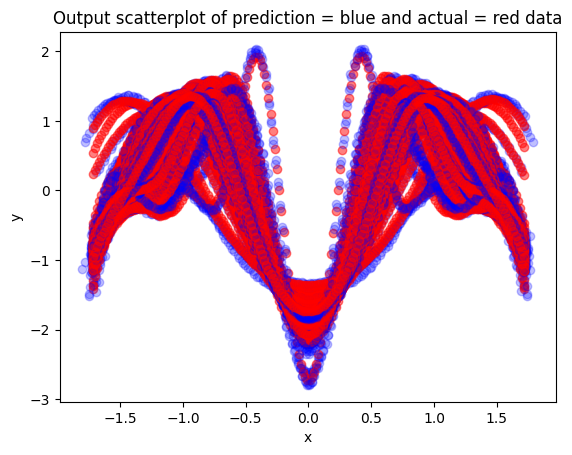

In [13]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=1000, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_10 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_11 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_12 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_13 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_14 (Dense)            (None, 400)               400400    
                                                                 
Total params: 9,406,400
Trainable params: 9,406,400
Non-tra

Epoch 151/2000
7/7 [==============================] - 1s 131ms/step - loss: 0.0266 - val_loss: 0.0269
Epoch 152/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0265 - val_loss: 0.0252
Epoch 153/2000
7/7 [==============================] - 1s 126ms/step - loss: 0.0243 - val_loss: 0.0272
Epoch 154/2000
7/7 [==============================] - 1s 129ms/step - loss: 0.0235 - val_loss: 0.0262
Epoch 155/2000
7/7 [==============================] - 1s 128ms/step - loss: 0.0234 - val_loss: 0.0298
Epoch 156/2000
7/7 [==============================] - 1s 125ms/step - loss: 0.0251 - val_loss: 0.0250
Epoch 157/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0232 - val_loss: 0.0284
Epoch 158/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0222 - val_loss: 0.0283
Epoch 159/2000
7/7 [==============================] - 1s 135ms/step - loss: 0.0209 - val_loss: 0.0263
Epoch 160/2000
7/7 [==============================] - 1s 126ms/step - loss: 0.0213

7/7 [==============================] - 1s 126ms/step - loss: 0.0180 - val_loss: 0.0241
Epoch 312/2000
7/7 [==============================] - 1s 126ms/step - loss: 0.0208 - val_loss: 0.0264
Epoch 313/2000
7/7 [==============================] - 1s 129ms/step - loss: 0.0197 - val_loss: 0.0250
Epoch 314/2000
7/7 [==============================] - 1s 126ms/step - loss: 0.0171 - val_loss: 0.0449
Epoch 315/2000
7/7 [==============================] - 1s 129ms/step - loss: 0.0229 - val_loss: 0.0274
Epoch 316/2000
7/7 [==============================] - 1s 127ms/step - loss: 0.0276 - val_loss: 0.0388
Epoch 317/2000
7/7 [==============================] - 1s 128ms/step - loss: 0.0268 - val_loss: 0.0268
Epoch 318/2000
7/7 [==============================] - 1s 138ms/step - loss: 0.0214 - val_loss: 0.0283
Epoch 319/2000
7/7 [==============================] - 1s 140ms/step - loss: 0.0187 - val_loss: 0.0315
Epoch 320/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0255 - val_loss: 0.

7/7 [==============================] - 1s 131ms/step - loss: 0.0154 - val_loss: 0.0243
Epoch 472/2000
7/7 [==============================] - 1s 147ms/step - loss: 0.0127 - val_loss: 0.0278
Epoch 473/2000
7/7 [==============================] - 1s 161ms/step - loss: 0.0129 - val_loss: 0.0225
Epoch 474/2000
7/7 [==============================] - 1s 147ms/step - loss: 0.0119 - val_loss: 0.0229
Epoch 475/2000
7/7 [==============================] - 1s 159ms/step - loss: 0.0115 - val_loss: 0.0294
Epoch 476/2000
7/7 [==============================] - 1s 177ms/step - loss: 0.0118 - val_loss: 0.0247
Epoch 477/2000
7/7 [==============================] - 1s 157ms/step - loss: 0.0114 - val_loss: 0.0249
Epoch 478/2000
7/7 [==============================] - 1s 149ms/step - loss: 0.0096 - val_loss: 0.0255
Epoch 479/2000
7/7 [==============================] - 1s 139ms/step - loss: 0.0084 - val_loss: 0.0253
Epoch 480/2000
7/7 [==============================] - 1s 188ms/step - loss: 0.0078 - val_loss: 0.

7/7 [==============================] - 1s 125ms/step - loss: 0.0097 - val_loss: 0.0283
Epoch 632/2000
7/7 [==============================] - 1s 133ms/step - loss: 0.0088 - val_loss: 0.0273
Epoch 633/2000
7/7 [==============================] - 1s 151ms/step - loss: 0.0107 - val_loss: 0.0310
Epoch 634/2000
7/7 [==============================] - 1s 138ms/step - loss: 0.0108 - val_loss: 0.0236
Epoch 635/2000
7/7 [==============================] - 1s 133ms/step - loss: 0.0085 - val_loss: 0.0303
Epoch 636/2000
7/7 [==============================] - 1s 183ms/step - loss: 0.0078 - val_loss: 0.0248
Epoch 637/2000
7/7 [==============================] - 1s 205ms/step - loss: 0.0140 - val_loss: 0.0210
Epoch 638/2000
7/7 [==============================] - 1s 151ms/step - loss: 0.0126 - val_loss: 0.0232
Epoch 639/2000
7/7 [==============================] - 1s 130ms/step - loss: 0.0118 - val_loss: 0.0210
Epoch 640/2000
7/7 [==============================] - 1s 139ms/step - loss: 0.0113 - val_loss: 0.

7/7 [==============================] - 1s 135ms/step - loss: 0.0030 - val_loss: 0.0206
Epoch 792/2000
7/7 [==============================] - 1s 130ms/step - loss: 0.0032 - val_loss: 0.0272
Epoch 793/2000
7/7 [==============================] - 1s 161ms/step - loss: 0.0030 - val_loss: 0.0209
Epoch 794/2000
7/7 [==============================] - 1s 138ms/step - loss: 0.0032 - val_loss: 0.0260
Epoch 795/2000
7/7 [==============================] - 1s 145ms/step - loss: 0.0028 - val_loss: 0.0213
Epoch 796/2000
7/7 [==============================] - 1s 145ms/step - loss: 0.0024 - val_loss: 0.0221
Epoch 797/2000
7/7 [==============================] - 1s 135ms/step - loss: 0.0023 - val_loss: 0.0226
Epoch 798/2000
7/7 [==============================] - 1s 154ms/step - loss: 0.0021 - val_loss: 0.0234
Epoch 799/2000
7/7 [==============================] - 1s 127ms/step - loss: 0.0020 - val_loss: 0.0226
Epoch 800/2000
7/7 [==============================] - 1s 125ms/step - loss: 0.0021 - val_loss: 0.

7/7 [==============================] - 1s 168ms/step - loss: 0.0080 - val_loss: 0.0225
Epoch 952/2000
7/7 [==============================] - 1s 215ms/step - loss: 0.0076 - val_loss: 0.0223
Epoch 953/2000
7/7 [==============================] - 2s 223ms/step - loss: 0.0059 - val_loss: 0.0247
Epoch 954/2000
7/7 [==============================] - 1s 183ms/step - loss: 0.0053 - val_loss: 0.0236
Epoch 955/2000
7/7 [==============================] - 1s 161ms/step - loss: 0.0046 - val_loss: 0.0212
Epoch 956/2000
7/7 [==============================] - 1s 200ms/step - loss: 0.0042 - val_loss: 0.0213
Epoch 957/2000
7/7 [==============================] - 1s 137ms/step - loss: 0.0037 - val_loss: 0.0220
Epoch 958/2000
7/7 [==============================] - 1s 135ms/step - loss: 0.0036 - val_loss: 0.0217
Epoch 959/2000
7/7 [==============================] - 1s 150ms/step - loss: 0.0032 - val_loss: 0.0219
Epoch 960/2000
7/7 [==============================] - 1s 148ms/step - loss: 0.0031 - val_loss: 0.

Epoch 1108/2000
7/7 [==============================] - 1s 181ms/step - loss: 3.8213e-04 - val_loss: 0.0211
Epoch 1109/2000
7/7 [==============================] - 1s 206ms/step - loss: 0.0014 - val_loss: 0.0215
Epoch 1110/2000
7/7 [==============================] - 1s 174ms/step - loss: 0.0015 - val_loss: 0.0236
Epoch 1111/2000
7/7 [==============================] - 1s 169ms/step - loss: 0.0013 - val_loss: 0.0207
Epoch 1112/2000
7/7 [==============================] - 1s 195ms/step - loss: 0.0015 - val_loss: 0.0257
Epoch 1113/2000
7/7 [==============================] - 2s 268ms/step - loss: 0.0018 - val_loss: 0.0201
Epoch 1114/2000
7/7 [==============================] - 1s 162ms/step - loss: 0.0016 - val_loss: 0.0219
Epoch 1115/2000
7/7 [==============================] - 1s 154ms/step - loss: 0.0019 - val_loss: 0.0198
Epoch 1116/2000
7/7 [==============================] - 1s 135ms/step - loss: 0.0035 - val_loss: 0.0239
Epoch 1117/2000
7/7 [==============================] - 1s 149ms/step 

Epoch 1266/2000
7/7 [==============================] - 1s 126ms/step - loss: 0.0068 - val_loss: 0.0204
Epoch 1267/2000
7/7 [==============================] - 1s 170ms/step - loss: 0.0057 - val_loss: 0.0303
Epoch 1268/2000
7/7 [==============================] - 1s 174ms/step - loss: 0.0045 - val_loss: 0.0244
Epoch 1269/2000
7/7 [==============================] - 1s 148ms/step - loss: 0.0041 - val_loss: 0.0300
Epoch 1270/2000
7/7 [==============================] - 1s 146ms/step - loss: 0.0039 - val_loss: 0.0230
Epoch 1271/2000
7/7 [==============================] - 1s 143ms/step - loss: 0.0055 - val_loss: 0.0308
Epoch 1272/2000
7/7 [==============================] - 1s 158ms/step - loss: 0.0050 - val_loss: 0.0247
Epoch 1273/2000
7/7 [==============================] - 1s 177ms/step - loss: 0.0037 - val_loss: 0.0263
Epoch 1274/2000
7/7 [==============================] - 1s 158ms/step - loss: 0.0038 - val_loss: 0.0263
Epoch 1275/2000
7/7 [==============================] - 1s 161ms/step - lo

7/7 [==============================] - 1s 126ms/step - loss: 4.7566e-04 - val_loss: 0.0240
Epoch 1345/2000
7/7 [==============================] - 1s 125ms/step - loss: 5.1386e-04 - val_loss: 0.0244
Epoch 1346/2000
7/7 [==============================] - 1s 126ms/step - loss: 5.1005e-04 - val_loss: 0.0252
Epoch 1347/2000
7/7 [==============================] - 1s 127ms/step - loss: 4.5617e-04 - val_loss: 0.0251
Epoch 1348/2000
7/7 [==============================] - 1s 126ms/step - loss: 4.0354e-04 - val_loss: 0.0248
Epoch 1349/2000
7/7 [==============================] - 1s 135ms/step - loss: 4.7742e-04 - val_loss: 0.0256
Epoch 1350/2000
7/7 [==============================] - 1s 158ms/step - loss: 4.4118e-04 - val_loss: 0.0245
Epoch 1351/2000
7/7 [==============================] - 1s 196ms/step - loss: 4.4666e-04 - val_loss: 0.0246
Epoch 1352/2000
7/7 [==============================] - 1s 133ms/step - loss: 3.8592e-04 - val_loss: 0.0247
Epoch 1353/2000
7/7 [==============================] 

Epoch 1499/2000
7/7 [==============================] - 1s 147ms/step - loss: 0.0024 - val_loss: 0.0225
Epoch 1500/2000
7/7 [==============================] - 1s 157ms/step - loss: 0.0036 - val_loss: 0.0250
Epoch 1501/2000
7/7 [==============================] - 1s 144ms/step - loss: 0.0039 - val_loss: 0.0214
Epoch 1502/2000
7/7 [==============================] - 1s 142ms/step - loss: 0.0060 - val_loss: 0.0259
Epoch 1503/2000
7/7 [==============================] - 1s 127ms/step - loss: 0.0051 - val_loss: 0.0262
Epoch 1504/2000
7/7 [==============================] - 1s 131ms/step - loss: 0.0059 - val_loss: 0.0219
Epoch 1505/2000
7/7 [==============================] - 1s 127ms/step - loss: 0.0080 - val_loss: 0.0233
Epoch 1506/2000
7/7 [==============================] - 1s 127ms/step - loss: 0.0069 - val_loss: 0.0243
Epoch 1507/2000
7/7 [==============================] - 1s 128ms/step - loss: 0.0056 - val_loss: 0.0255
Epoch 1508/2000
7/7 [==============================] - 1s 128ms/step - lo

7/7 [==============================] - 1s 177ms/step - loss: 1.7966e-04 - val_loss: 0.0246
Epoch 1655/2000
7/7 [==============================] - 1s 143ms/step - loss: 1.7805e-04 - val_loss: 0.0250
Epoch 1656/2000
7/7 [==============================] - 1s 138ms/step - loss: 1.6506e-04 - val_loss: 0.0245
Epoch 1657/2000
7/7 [==============================] - 1s 147ms/step - loss: 1.5396e-04 - val_loss: 0.0247
Epoch 1658/2000
7/7 [==============================] - 1s 140ms/step - loss: 1.4831e-04 - val_loss: 0.0251
Epoch 1659/2000
7/7 [==============================] - 1s 147ms/step - loss: 1.7180e-04 - val_loss: 0.0246
Epoch 1660/2000
7/7 [==============================] - 1s 143ms/step - loss: 1.4613e-04 - val_loss: 0.0249
Epoch 1661/2000
7/7 [==============================] - 1s 143ms/step - loss: 1.3366e-04 - val_loss: 0.0246
Epoch 1662/2000
7/7 [==============================] - 1s 135ms/step - loss: 1.2773e-04 - val_loss: 0.0247
Epoch 1663/2000
7/7 [==============================] 

7/7 [==============================] - 1s 140ms/step - loss: 0.0021 - val_loss: 0.0223
Epoch 1811/2000
7/7 [==============================] - 1s 128ms/step - loss: 0.0017 - val_loss: 0.0235
Epoch 1812/2000
7/7 [==============================] - 1s 179ms/step - loss: 0.0014 - val_loss: 0.0221
Epoch 1813/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0011 - val_loss: 0.0223
Epoch 1814/2000
7/7 [==============================] - 1s 136ms/step - loss: 8.4487e-04 - val_loss: 0.0216
Epoch 1815/2000
7/7 [==============================] - 1s 136ms/step - loss: 8.6858e-04 - val_loss: 0.0233
Epoch 1816/2000
7/7 [==============================] - 1s 132ms/step - loss: 0.0011 - val_loss: 0.0222
Epoch 1817/2000
7/7 [==============================] - 1s 137ms/step - loss: 6.5610e-04 - val_loss: 0.0225
Epoch 1818/2000
7/7 [==============================] - 1s 131ms/step - loss: 7.6787e-04 - val_loss: 0.0223
Epoch 1819/2000
7/7 [==============================] - 1s 129ms/step - lo

7/7 [==============================] - 1s 139ms/step - loss: 2.0491e-04 - val_loss: 0.0225
Epoch 1888/2000
7/7 [==============================] - 1s 135ms/step - loss: 1.8663e-04 - val_loss: 0.0223
Epoch 1889/2000
7/7 [==============================] - 1s 149ms/step - loss: 2.0648e-04 - val_loss: 0.0223
Epoch 1890/2000
7/7 [==============================] - 1s 149ms/step - loss: 1.7305e-04 - val_loss: 0.0222
Epoch 1891/2000
7/7 [==============================] - 1s 139ms/step - loss: 1.8273e-04 - val_loss: 0.0223
Epoch 1892/2000
7/7 [==============================] - 1s 146ms/step - loss: 1.5426e-04 - val_loss: 0.0224
Epoch 1893/2000
7/7 [==============================] - 1s 166ms/step - loss: 1.6456e-04 - val_loss: 0.0222
Epoch 1894/2000
7/7 [==============================] - 1s 160ms/step - loss: 1.6911e-04 - val_loss: 0.0224
Epoch 1895/2000
7/7 [==============================] - 1s 149ms/step - loss: 2.2941e-04 - val_loss: 0.0224
Epoch 1896/2000
7/7 [==============================] 

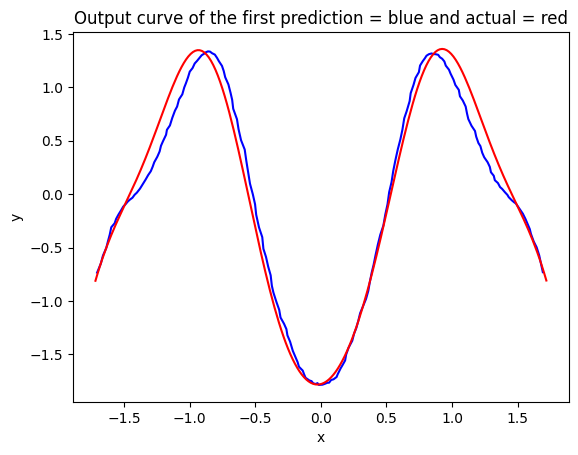

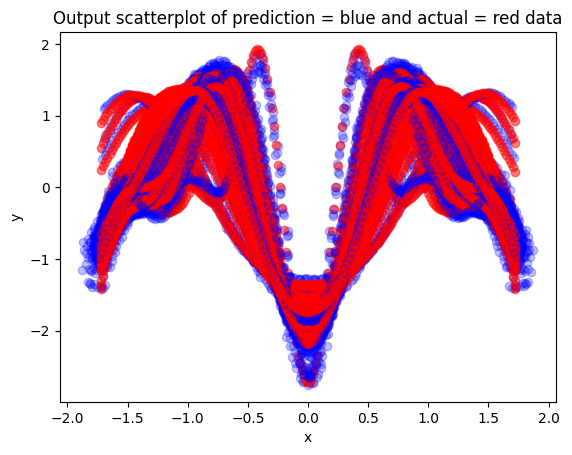

In [14]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=2000, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))